In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from numpy.random import choice

In [170]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

In [171]:
df = pd.read_csv('stud_math.csv', encoding="utf-8")

### Первичный осмотр данных

In [172]:
df.sample(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
366,MS,M,18,U,LE3,T,4.0,4.0,teacher,services,other,mother,2.0,3.0,0.0,no,no,yes,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,65.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,-6.0,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,-6.0,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
71,GP,M,15,U,GT3,T,4.0,2.0,other,other,course,mother,1.0,4.0,0.0,no,no,no,no,yes,-12.0,yes,yes,no,3.0,3.0,3.0,3.0,0.0,50.0
83,GP,M,15,U,LE3,T,2.0,2.0,services,services,home,mother,2.0,2.0,0.0,no,no,yes,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,4.0,4.0,75.0
246,GP,M,17,U,GT3,T,2.0,3.0,other,other,course,father,2.0,1.0,0.0,no,NaN,NaN,no,yes,-3.0,yes,yes,no,5.0,2.0,2.0,2.0,4.0,65.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
148,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,yes,NaN,no,yes,-3.0,no,yes,yes,3.0,3.0,2.0,5.0,0.0,0.0


In [173]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,F,M,M,F,M,M,F,F,M,M,M
age,18,17,15,15,16,16,16,17,15,15,15,15,15,15,15
address,U,U,U,U,U,U,NaN,U,U,U,U,U,U,U,U
famsize,NaN,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,NaN,GT3,GT3,LE3,GT3,GT3
Pstatus,A,NaN,T,T,T,T,T,A,A,NaN,T,NaN,T,T,A
Medu,4,1,1,4,3,4,2,4,3,3,4,2,4,4,2
Fedu,4,1,1,2,3,3,2,4,2,4,4,40,4,3,2
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,teacher,services,health,teacher,other
Fjob,teacher,other,other,NaN,other,other,other,teacher,other,other,health,other,services,other,other


In [174]:
df.shape

(395, 30)

In [175]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

<AxesSubplot:>

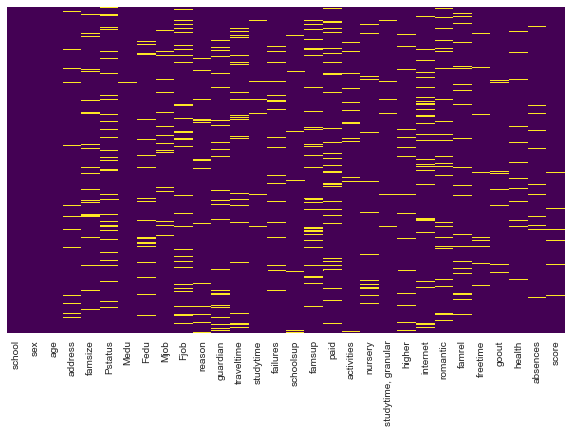

In [176]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

* Почти во всех столюбцах есть пропуски. Наибольшее количество в Pstatus и Paid

In [177]:
df_copy = df.copy(deep=True)

In [178]:
df_copy = df_copy.dropna(how="any")
df_copy.shape

(97, 30)

In [179]:
df_copy.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.071662,-0.056929,0.143682,-0.220209,0.320914,0.220209,0.057039,0.040115,0.106748,0.037152,0.142780,-0.186407
Medu,-0.071662,1.000000,0.684379,-0.248099,-0.042491,-0.135065,0.042491,-0.032146,-0.032350,0.023938,-0.124250,0.101253,0.064914
Fedu,-0.056929,0.684379,1.000000,-0.162149,-0.001350,-0.189926,0.001350,-0.059084,-0.135575,-0.087894,0.086575,0.059172,-0.014236
traveltime,0.143682,-0.248099,-0.162149,1.000000,-0.034571,-0.029138,0.034571,-0.134113,-0.071376,-0.094331,0.147160,-0.148719,-0.094874
studytime,-0.220209,-0.042491,-0.001350,-0.034571,1.000000,-0.016541,-1.000000,0.025253,-0.226503,-0.129162,-0.067115,-0.018695,-0.029742
failures,0.320914,-0.135065,-0.189926,-0.029138,-0.016541,1.000000,0.016541,-0.095520,-0.043110,-0.021022,0.057279,0.239602,-0.314698
"studytime, granular",0.220209,0.042491,0.001350,0.034571,-1.000000,0.016541,1.000000,-0.025253,0.226503,0.129162,0.067115,0.018695,0.029742
famrel,0.057039,-0.032146,-0.059084,-0.134113,0.025253,-0.095520,-0.025253,1.000000,0.084336,0.069922,0.178145,0.016312,-0.026742
freetime,0.040115,-0.032350,-0.135575,-0.071376,-0.226503,-0.043110,0.226503,0.084336,1.000000,0.381049,0.120714,0.093512,0.068862
goout,0.106748,0.023938,-0.087894,-0.094331,-0.129162,-0.021022,0.129162,0.069922,0.381049,1.000000,-0.033206,0.094859,-0.079187


In [180]:
df_copy[["studytime", "studytime, granular"]].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [181]:
df.dtypes

school                  object
sex                     object
age                      int64
address                 object
famsize                 object
Pstatus                 object
Medu                   float64
Fedu                   float64
Mjob                    object
Fjob                    object
reason                  object
guardian                object
traveltime             float64
studytime              float64
failures               float64
schoolsup               object
famsup                  object
paid                    object
activities              object
nursery                 object
studytime, granular    float64
higher                  object
internet                object
romantic                object
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object

In [182]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


### Binary Data

In [183]:
# binary data
df_binary = df.loc[:, ["school", 
                       "sex", 
                       "address", 
                       "famsize", 
                       #"Pstatus", 
                       "schoolsup", 
                       "famsup", 
                       "paid", 
                       "activities", 
                       "nursery", 
                       "higher", 
                       "internet", 
                       "romantic", 
                       "score"]]

In [184]:
# binary data without NaN
df_binary_noNaN = df.loc[:, ["school", 
                             "sex", 
                             "address", 
                             "famsize", 
                             #"Pstatus", 
                             "schoolsup", 
                             "famsup", 
                             "paid", 
                             "activities", 
                             "nursery", 
                             "higher", 
                             "internet", 
                             "romantic", 
                             "score"]].dropna(how="any")

In [185]:
df_binary_noNaN.shape

(194, 13)

In [186]:
# binary data with dummies
df_binary_dummies = pd.get_dummies(df_binary_noNaN, columns=["school", 
                       "sex", 
                       "address", 
                       "famsize", 
                       #"Pstatus", 
                       "schoolsup", 
                       "famsup", 
                       "paid", 
                       "activities", 
                       "nursery", 
                       "higher", 
                       "internet", 
                       "romantic"], drop_first = True)

In [187]:
df_binary_dummies.head(10)

,score,school_MS,sex_M,address_U,famsize_LE3,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
1,30.0,0,0,1,0,0,1,0,0,0,1,1,0
3,75.0,0,0,1,0,0,1,1,1,1,1,1,1
4,50.0,0,0,1,0,0,1,1,0,1,1,0,0
5,75.0,0,1,1,1,0,1,1,1,1,1,1,0
7,30.0,0,0,1,0,1,1,0,0,1,1,0,0
8,95.0,0,1,1,1,0,1,1,0,1,1,1,0
10,45.0,0,0,1,0,0,1,1,0,1,1,1,0
11,60.0,0,0,1,0,0,1,0,1,1,1,1,0
14,80.0,0,1,1,0,0,1,0,0,1,1,1,1
15,70.0,0,0,1,0,0,1,0,0,1,1,1,0


In [188]:
corrMatt = df_binary_dummies.corr()

<AxesSubplot:>

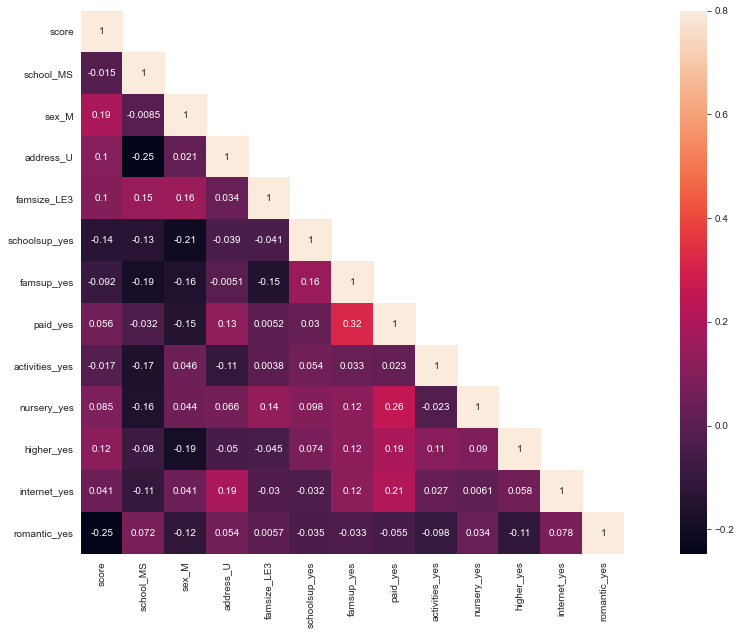

In [189]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [190]:
df[["school", 
                       "sex", 
                       "address", 
                       "famsize", 
                       "Pstatus", 
                       "schoolsup", 
                       "famsup", 
                       "paid", 
                       "activities", 
                       "nursery", 
                       "higher", 
                       "internet", 
                       "romantic"]].isnull().sum()

school         0
sex            0
address       17
famsize       27
Pstatus       45
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
dtype: int64

#### Заполняем пропущенные данные в binary data

In [191]:
# sex -- schoolsup
# Мужской пол студента и доп. образов. поддержка негативно скоррелированны

def sex_schoolsup(row):
    elements = ['yes', 'no'] 
    weights_M = [0.2, 0.8] # вероятности (веса) выбора элемента, если независимая переменная == "M"
    weights_F = [0.8, 0.2] # вероятности (веса) выбора элемента, если независимая переменная == "F"
    if pd.isnull(row.schoolsup):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.schoolsup

In [192]:
df["schoolsup"] = df.apply(sex_schoolsup, axis = 1)

In [193]:
df["schoolsup"].value_counts()

no     339
yes     56
Name: schoolsup, dtype: int64

In [194]:
# sex -- higher
# Мужской пол студента и его желание получить высшее обр. негативно скореллированны

def sex_higher(row):
    elements = ['yes', 'no'] 
    weights_M = [0.25, 0.75] # вероятности (веса) выбора элемента, если независимая переменная == "M"
    weights_F = [0.75, 0.25] # вероятности (веса) выбора элемента, если независимая переменная == "F"
    if pd.isnull(row.higher):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.higher

In [195]:
df["higher"] = df.apply(sex_higher, axis = 1)

In [196]:
df["higher"].value_counts()

yes    363
no      32
Name: higher, dtype: int64

In [197]:
# sex -- famsize
# интересна пол. корр. мужского пола ребенка и небольшого размера семьи
# Возможно, объяснение в том, что в развивающихся странах родители стремятся получить мальчика, 
# поэтому девочки чаще встречаются в больших семьях

def sex_famsize(row):
    elements = ['LE3', 'GT3'] 
    weights_M = [0.80, 0.20]
    weights_F = [0.20, 0.80]
    if pd.isnull(row.famsize):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.famsize

In [198]:
df["famsize"] = df.apply(sex_famsize, axis = 1)

In [199]:
df["famsize"].value_counts()

GT3    271
LE3    124
Name: famsize, dtype: int64

In [200]:
# famsize -- famsup
# больше семья ("GT3") - выше вероятность семейной образовательной поддержки

def famsize_famsup(row):
    elements = ['yes', 'no'] 
    weights_LE3 = [0.20, 0.80]
    weights_GT3 = [0.80, 0.20]
    if pd.isnull(row.famsup):
        if row.famsize == "LE3":
            return choice(elements, p=weights_LE3)
        return choice(elements, p=weights_GT3)
    return row.famsup

In [201]:
df["famsup"] = df.apply(famsize_famsup, axis = 1)

In [202]:
df["famsup"].value_counts()

yes    240
no     155
Name: famsup, dtype: int64

In [203]:
# school -- address
# Дети, живущие за городом, чаще ходят в школу MS

def school_address(row):
    elements = ['U', 'R'] 
    weights_GP = [0.80, 0.20]
    weights_MS = [0.20, 0.80]
    if pd.isnull(row.address):
        if row.school == "GP":
            return choice(elements, p=weights_GP)
        return choice(elements, p=weights_MS)
    return row.address   

In [204]:
df["address"] = df.apply(school_address, axis = 1)

In [205]:
df["address"].value_counts()

U    307
R     88
Name: address, dtype: int64

In [206]:
# school -- activities
# Учащиеся в школе MS имеют меньше времени на внеучебные занятия

def school_activities(row):
    elements = ['yes', 'no'] 
    weights_GP = [0.70, 0.30]
    weights_MS = [0.30, 0.70]   
    if pd.isnull(row.activities):
        if row.school == "GP":
            return choice(elements, p=weights_GP)
        return choice(elements, p=weights_MS)
    return row.activities 

In [207]:
df["activities"] = df.apply(school_activities, axis = 1)

In [208]:
df["activities"].value_counts()

yes    207
no     188
Name: activities, dtype: int64

In [209]:
# famsup -- paid
# поддержка семьи положительно влияет на наличие платных занятий по математике

def famsup_paid(row):
    elements = ['yes', 'no'] 
    weights_yes = [0.9, 0.1]
    weights_no = [0.1, 0.9]   
    if pd.isnull(row.paid):
        if row.famsup == "yes":
            return choice(elements, p=weights_yes)
        return choice(elements, p=weights_no)
    return row.paid 

In [210]:
df["paid"] = df.apply(famsup_paid, axis = 1)

In [211]:
df["paid"].value_counts()

no     216
yes    179
Name: paid, dtype: int64

In [212]:
# paid -- internet
# Платные занятия по математике положительно скоррелированны с наличием доступа к интернету дома

def paid_internet(row):
    elements = ['yes', 'no'] 
    weights_yes = [0.8, 0.2]
    weights_no = [0.2, 0.8]   
    if pd.isnull(row.internet):
        if row.paid == "yes":
            return choice(elements, p=weights_yes)
        return choice(elements, p=weights_no)
    return row.internet     

In [213]:
df["internet"] = df.apply(paid_internet, axis = 1)

In [214]:
df["internet"].value_counts()

yes    317
no      78
Name: internet, dtype: int64

In [215]:
# paid -- nursery
# Если родители платят за доп. занятия по математике, высока вероятность, что ребенок посещал дет. сад

def paid_nursery(row):
    elements = ['yes', 'no'] 
    weights_yes = [0.8, 0.2]
    weights_no = [0.2, 0.8]   
    if pd.isnull(row.nursery):
        if row.paid == "yes":
            return choice(elements, p=weights_yes)
        return choice(elements, p=weights_no)
    return row.nursery

In [216]:
df["nursery"] = df.apply(paid_nursery, axis = 1)

In [217]:
df["nursery"].value_counts()

yes    311
no      84
Name: nursery, dtype: int64

In [218]:
# sex -- romantic
# в нашем датасете девочки мальчиков состоят в романтических отношениях

def sex_romantic(row):
    elements = ['yes', 'no'] 
    weights_F = [0.7, 0.3]
    weights_M = [0.3, 0.7]   
    if pd.isnull(row.romantic):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.romantic

In [219]:
df["romantic"] = df.apply(sex_romantic, axis = 1)

In [220]:
df["romantic"].value_counts()

no     258
yes    137
Name: romantic, dtype: int64

In [221]:
# Переменная Pstatus не влияет зависимую переменную score. Удалим ее

df.drop("Pstatus", axis=1, inplace=True)

In [222]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                 0
famsize                 0
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                  0
paid                    0
activities              0
nursery                 0
studytime, granular     7
higher                  0
internet                0
romantic                0
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [223]:
df_binary.shape

(395, 13)

In [224]:
df_binary.loc[:, "sex":].dropna(how="all").shape


(395, 12)

graph for school


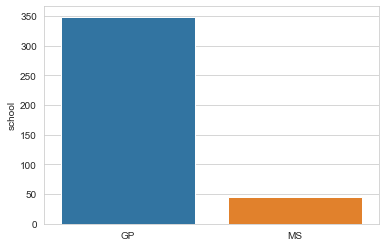

graph for sex


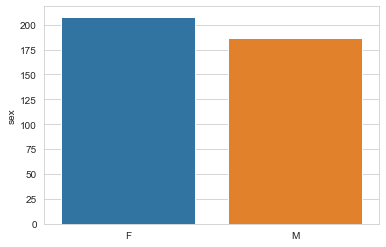

graph for address


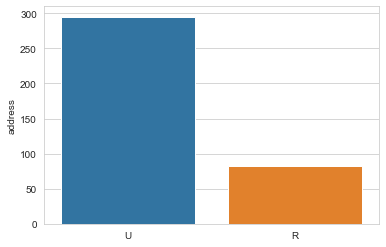

graph for famsize


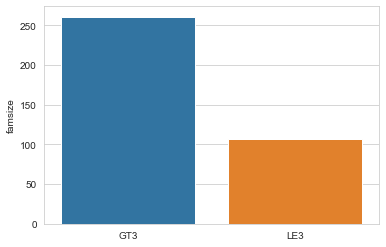

graph for schoolsup


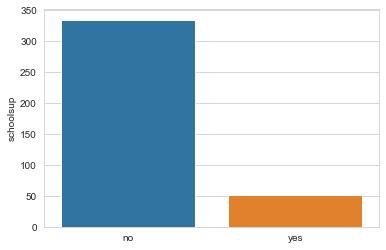

graph for famsup


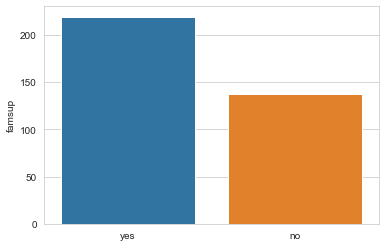

graph for paid


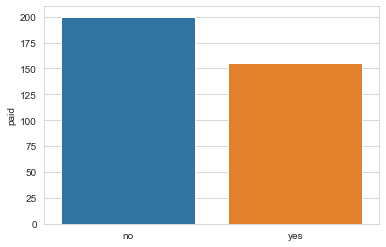

graph for activities


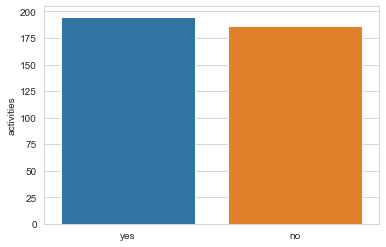

graph for nursery


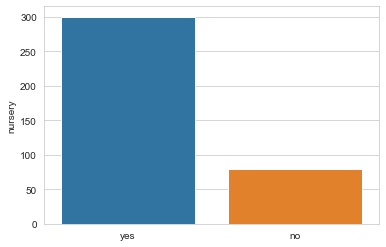

graph for higher


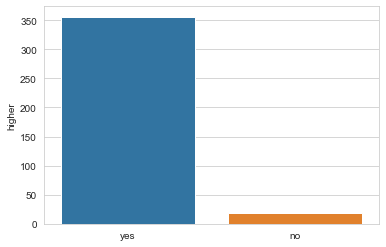

graph for internet


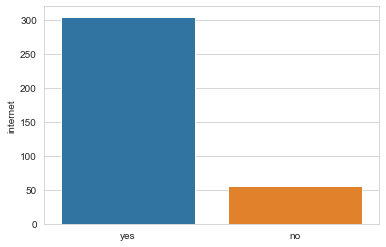

graph for romantic


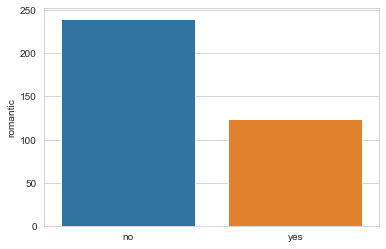

graph for score


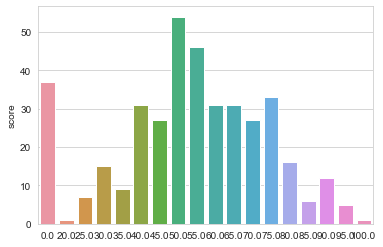

In [225]:
for i in df_binary.columns:
    bin_num = df_binary[i].value_counts(normalize=False)
    print("graph for %s" % (i))
    sns.barplot(x = bin_num.index, y = bin_num)
    plt.show()

### Nominal Data

In [226]:
# nominal data
df_nominal = df.loc[:, ["Mjob", "Fjob", "reason", "guardian"]]

In [227]:
# nominal data without NaN
df_nominal_noNaN = df.loc[:, ["Mjob", "Fjob", "reason", "guardian"]].dropna(how="any")

In [228]:
df_nominal_noNaN.shape

(298, 4)

graph for Mjob


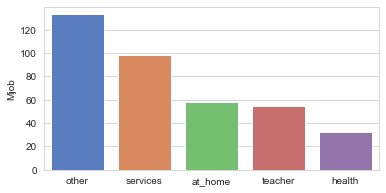

graph for Fjob


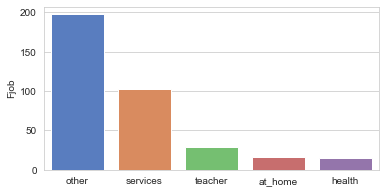

graph for reason


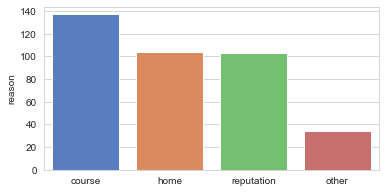

graph for guardian


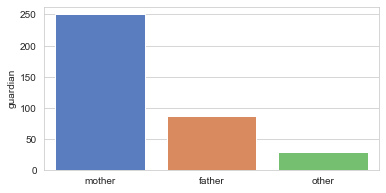

In [229]:
for i in df_nominal.columns:
    nom_num = df_nominal[i].value_counts()
    print("graph for %s" % (i))
    plt.subplots(figsize=(6,3))
    sns.set_style("whitegrid")
    sns.barplot(x = nom_num.index, y = nom_num, ci = None, palette = "muted", orient = 'v')
    plt.show()

<AxesSubplot:xlabel='Mjob', ylabel='score'>

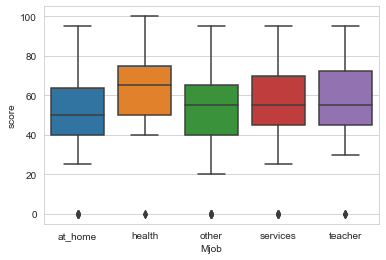

In [230]:
sns.boxplot(x="Mjob", y="score", data = df)

In [231]:
df["Mjob"].isna().sum()

19

In [232]:
w_mjobs = df["Mjob"].value_counts(normalize=True).tolist()

In [233]:
def mjob_fill(row):
    elements = ["other", "services", "at_home", "teacher", "health"]
    weights = w_mjobs # вероятности (веса) выбора элемента, если независимая переменная == "F"
    if pd.isnull(row.Mjob):
        return choice(elements, p=weights)
    return row.Mjob

In [234]:
df["Mjob"] = df.apply(mjob_fill, axis = 1)

In [235]:
df["Mjob"].isna().sum()

0

<AxesSubplot:xlabel='Fjob', ylabel='score'>

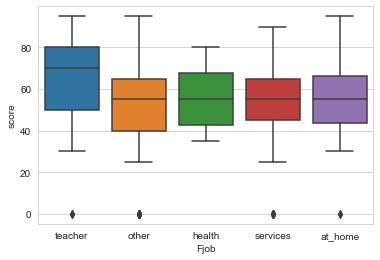

In [236]:
sns.boxplot(x="Fjob", y="score", data = df)

In [237]:
df["Fjob"].isnull().sum()

36

In [238]:
# Fjob  .tolist()
el_fjobs = df["Fjob"].value_counts(normalize=True).index.tolist()
w_fjobs = df["Fjob"].value_counts(normalize=True).values.tolist()

In [239]:
print(el_fjobs)
print(w_fjobs)

['other', 'services', 'teacher', 'at_home', 'health']
[0.5487465181058496, 0.2841225626740947, 0.0807799442896936, 0.04456824512534819, 0.04178272980501393]


In [240]:
def fjob_fill(row):
    elements = el_fjobs
    weights = w_fjobs
    if pd.isnull(row.Fjob):
        return choice(elements, p=weights)
    return row.Fjob

In [241]:
df["Fjob"] = df.apply(fjob_fill, axis=1)

In [242]:
df["Fjob"].isna().sum()

0

<AxesSubplot:xlabel='reason', ylabel='score'>

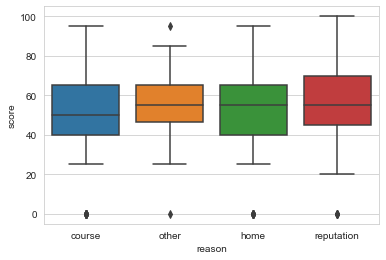

In [243]:
sns.boxplot(x="reason", y="score", data = df)

<AxesSubplot:xlabel='guardian', ylabel='score'>

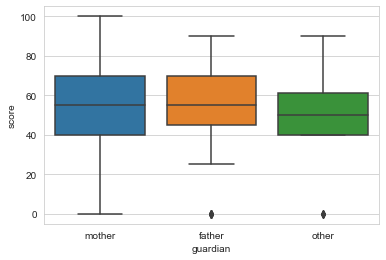

In [244]:
sns.boxplot(x="guardian", y="score", data = df)

In [245]:
df.groupby("Mjob").score.mean()

Mjob
at_home     46.774194
health      59.696970
other       50.488722
services    54.362745
teacher     54.237288
Name: score, dtype: float64

In [246]:
# Не похоже, чтобы переменные reason и guardian оказывали влияние на score. Удилим их

In [247]:
df.drop(["reason", "guardian"], axis=1, inplace=True)

In [248]:
df.isna().sum()

school                  0
sex                     0
age                     0
address                 0
famsize                 0
Medu                    3
Fedu                   24
Mjob                    0
Fjob                    0
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                  0
paid                    0
activities              0
nursery                 0
studytime, granular     7
higher                  0
internet                0
romantic                0
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

### Ordinal Data

In [249]:
# ordinal data
df_ordinal = df.loc[:, ["Medu", 
                        "Fedu", 
                        "traveltime", 
                        "studytime", 
                        "failures", 
                        "famrel", 
                        "freetime", 
                        "goout", 
                        "health"]]

In [250]:
# ordinal data without NaN
df_ordinal_noNaN = df.loc[:, ["Medu", 
                        "Fedu", 
                        "traveltime", 
                        "studytime", 
                        "failures", 
                        "famrel", 
                        "freetime", 
                        "goout", 
                        "health"]].dropna(how="any")

In [251]:
df_ordinal_noNaN.shape

(275, 9)

graph for Medu


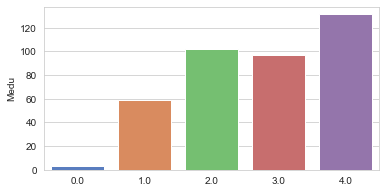

graph for Fedu


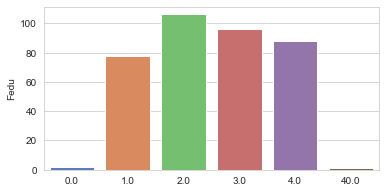

graph for traveltime


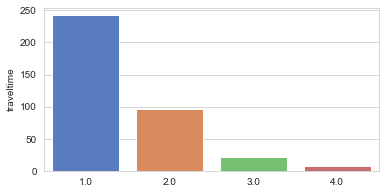

graph for studytime


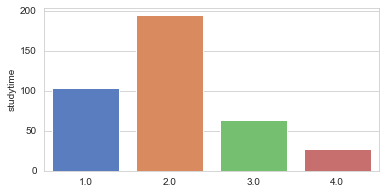

graph for failures


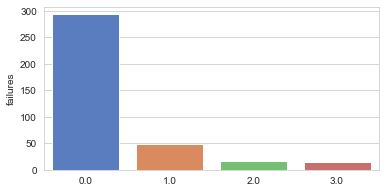

graph for famrel


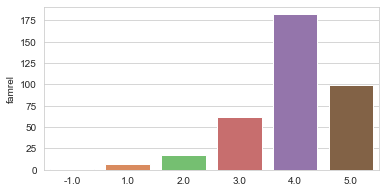

graph for freetime


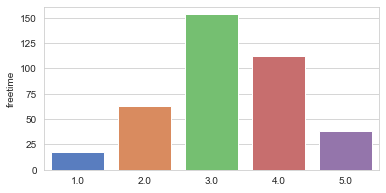

graph for goout


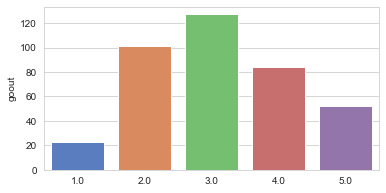

graph for health


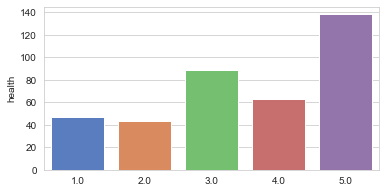

In [252]:
for i in df_ordinal.columns:
    ord_num = df_ordinal[i].value_counts()
    print("graph for %s" % (i))
    plt.subplots(figsize=(6,3))
    sns.set_style("whitegrid")
    sns.barplot(x = ord_num.index, y = ord_num, ci = None, palette = "muted", orient = 'v')
    plt.show()

In [253]:
df_bin_ord_dummies = pd.get_dummies(df, columns=["school", 
                                                 "sex", 
                                                 "address", 
                                                 "famsize",  
                                                 "schoolsup", 
                                                 "famsup", 
                                                 "paid", 
                                                 "activities", 
                                                 "nursery", 
                                                 "higher", 
                                                 "internet", 
                                                 "romantic"], drop_first=True)

<AxesSubplot:>

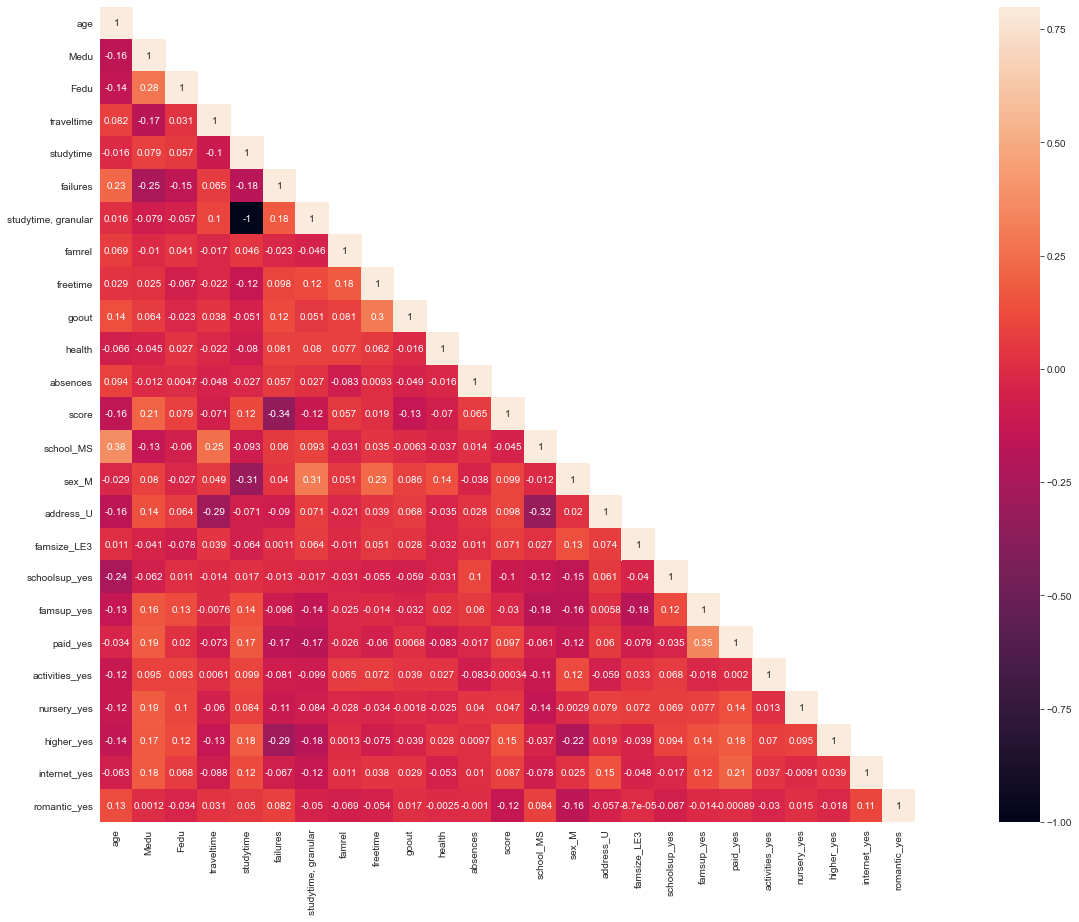

In [254]:
corrMatt = df_bin_ord_dummies.corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,15)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [255]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                 0
famsize                 0
Medu                    3
Fedu                   24
Mjob                    0
Fjob                    0
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                  0
paid                    0
activities              0
nursery                 0
studytime, granular     7
higher                  0
internet                0
romantic                0
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [256]:
# Medu
el_medu = df.Medu.value_counts(normalize=True).index.tolist()
w_medu = df.Medu.value_counts(normalize=True).tolist()
print(el_medu)
print(w_medu)

[4.0, 2.0, 3.0, 1.0, 0.0]
[0.33418367346938777, 0.2602040816326531, 0.24744897959183673, 0.15051020408163265, 0.007653061224489796]


In [257]:
def medu_fill(row):
    elements = el_medu
    weights = w_medu 
    if pd.isnull(row.Medu):
        return choice(elements, p=weights)
    return row.Medu

In [258]:
df["Medu"] = df.apply(medu_fill, axis=1)

In [259]:
df["Medu"].isna().sum()

0

In [260]:
# Fedu

In [261]:
# Уберем выброс
df["Fedu"] = df.Fedu.apply(lambda x: 4.0 if x > 4.0 else x)

In [262]:
# Заполним пропуски

In [263]:
el_fedu = df.Fedu.value_counts(normalize=True).index.tolist()
w_fedu = df.Fedu.value_counts(normalize=True).tolist()

In [264]:
def fedu_fill(row):
    elements = el_fedu
    weights = w_fedu 
    if pd.isnull(row.Fedu):
        return choice(elements, p=weights)
    return row.Fedu

In [265]:
df["Fedu"] = df.apply(fedu_fill, axis=1)

In [266]:
df["Fedu"].isna().sum()

0

In [267]:
# sex -- health
df["health"].fillna(df.health.median(), inplace=True)

In [268]:
# sex -- freetime
df["freetime"].fillna(df.freetime.median(), inplace=True)

In [269]:
# freetime -- goout
# Чем больше свободного времени, тем чаще проводят время с друзьями

def freetime_goout(row):
    elements = [1.0, 2.0, 3.0, 4.0, 5.0]
    weights12 = [0.2, 0.3, 0.4, 0.05, 0.05]
    weights35 = [0.05, 0.05, 0.4, 0.3, 0.2]
    if pd.isnull(row.goout):
        if row.freetime <= 2.0:
            return choice(elements, p=weights12)
        return choice(elements, p=weights35)
    return row.goout    

In [270]:
df["goout"] = df.apply(freetime_goout, axis=1)

In [271]:
# sex -- studytime
# Мальчики тратят меньше времени на учебу помимо школы в неделю

def sex_studytime(row):
    elements = [1.0, 2.0, 3.0, 4.0]
    weights_M = [0.3, 0.4, 0.2, 0.1]
    weights_F = [0.1, 0.2, 0.4, 0.3]
    if pd.isnull(row.studytime):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.studytime 

In [272]:
df["studytime"] = df.apply(sex_studytime, axis=1)

In [273]:
# studytime / granular
df.drop(["studytime, granular"], axis=1, inplace=True)

In [274]:
# address -- traveltime
# Живущие за городом тратят больше времени на дорогу до школы

def address_traveltime(row):
    elements = [1.0, 2.0, 3.0, 4.0]
    weights_U = [0.65, 0.25, 0.08, 0.02]
    weights_R = [0.25, 0.45, 0.28, 0.02]
    if pd.isnull(row.traveltime):
        if row.address == "U":
            return choice(elements, p=weights_U)
        return choice(elements, p=weights_R)
    return row.traveltime 

In [275]:
df["traveltime"] = df.apply(address_traveltime, axis=1)

In [276]:
# higher -- failures
# Желание получить высшее образование негативно влияет на количество внеучебных неудач

def higher_failures(row):
    elements = [0.0, 1.0, 2.0, 3.0]
    weights_yes = [0.8, 0.12, 0.04, 0.04]
    weights_no = [0.5, 0.3, 0.15, 0.05]
    if pd.isnull(row.failures):
        if row.higher == "yes":
            return choice(elements, p=weights_yes)
        return choice(elements, p=weights_no)
    return row.failures

In [277]:
df["failures"] = df.apply(higher_failures, axis=1)

In [278]:
df.failures.value_counts(normalize=True)

0.0    0.787342
1.0    0.129114
2.0    0.045570
3.0    0.037975
Name: failures, dtype: float64

In [279]:
# freetime -- famrel
df["famrel"].fillna(df.famrel.median(), inplace=True)

### Ratio Data

In [280]:
# ratio data
df_ratio = df.loc[:, ["age", "absences", "score"]]

In [281]:
# ratio data without NaN
df_ratio_noNaN = df.loc[:, ["age", "absences", "score"]].dropna(how="any")

In [282]:
df_ratio_noNaN.shape

(378, 3)

graph for age


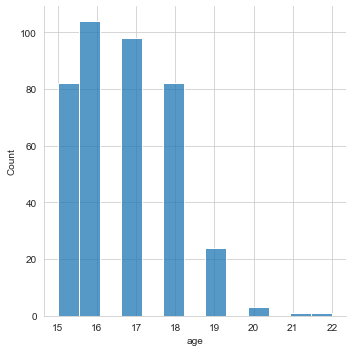

graph for absences


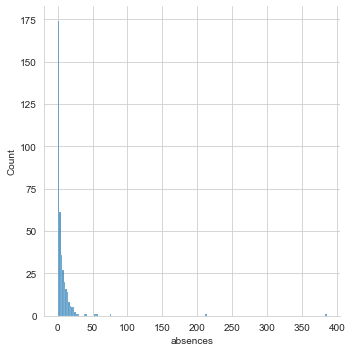

graph for score


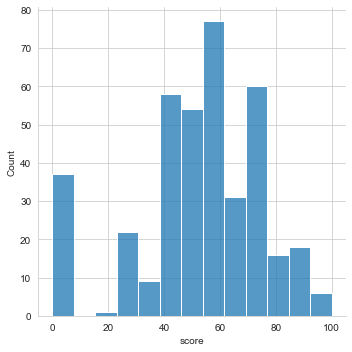

In [283]:
for i in df_ratio.columns:
    rat_num = df_ratio[i]
    print("graph for %s" % (i))
    #plt.subplots(figsize=(6,3))
    sns.set_style("whitegrid")
    sns.displot(df_ratio, x = i)
#   sns.barplot(x = ord_num.index, y = ord_num, ci = None, palette = "muted", orient = 'v')
    plt.show()

In [284]:
# В столбце absences наблюдаем два выброса. Избавимся от них

<AxesSubplot:>

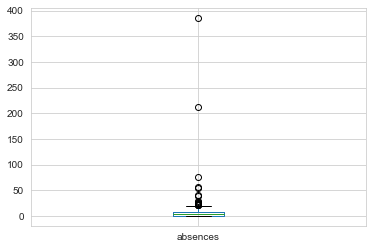

In [285]:
df.absences.plot(kind="box")

In [286]:
df["absences"] = df.absences.apply(lambda x: df["absences"].median() if x > 100 else x)

In [287]:
df["absences"].isna().sum()

12

In [288]:
# Пропуски заполним модой


In [289]:
df["absences"].fillna(df.absences.mode()[0], inplace=True)

In [290]:
df["absences"].isna().sum()

0

<AxesSubplot:>

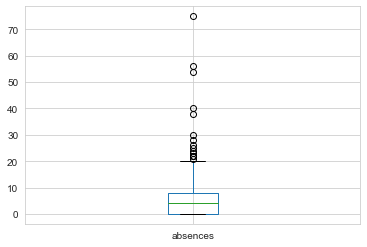

In [291]:
df.absences.plot(kind="box")

In [292]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         6
dtype: int64

In [293]:
# Осталось всего шесть пропусков в колонке score. Удилим строки с выбросами

In [294]:
df.dropna(how="any", inplace=True)

In [295]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         0
dtype: int64

In [296]:
df.shape

(389, 26)

In [297]:
df_dummies = pd.get_dummies(df, columns=["school", 
                       "sex", 
                       "address", 
                       "famsize", 
                       #"Pstatus", 
                       "schoolsup", 
                       "famsup", 
                       "paid", 
                       "activities", 
                       "nursery", 
                       "higher", 
                       "internet", 
                       "romantic"], drop_first = True)

<AxesSubplot:>

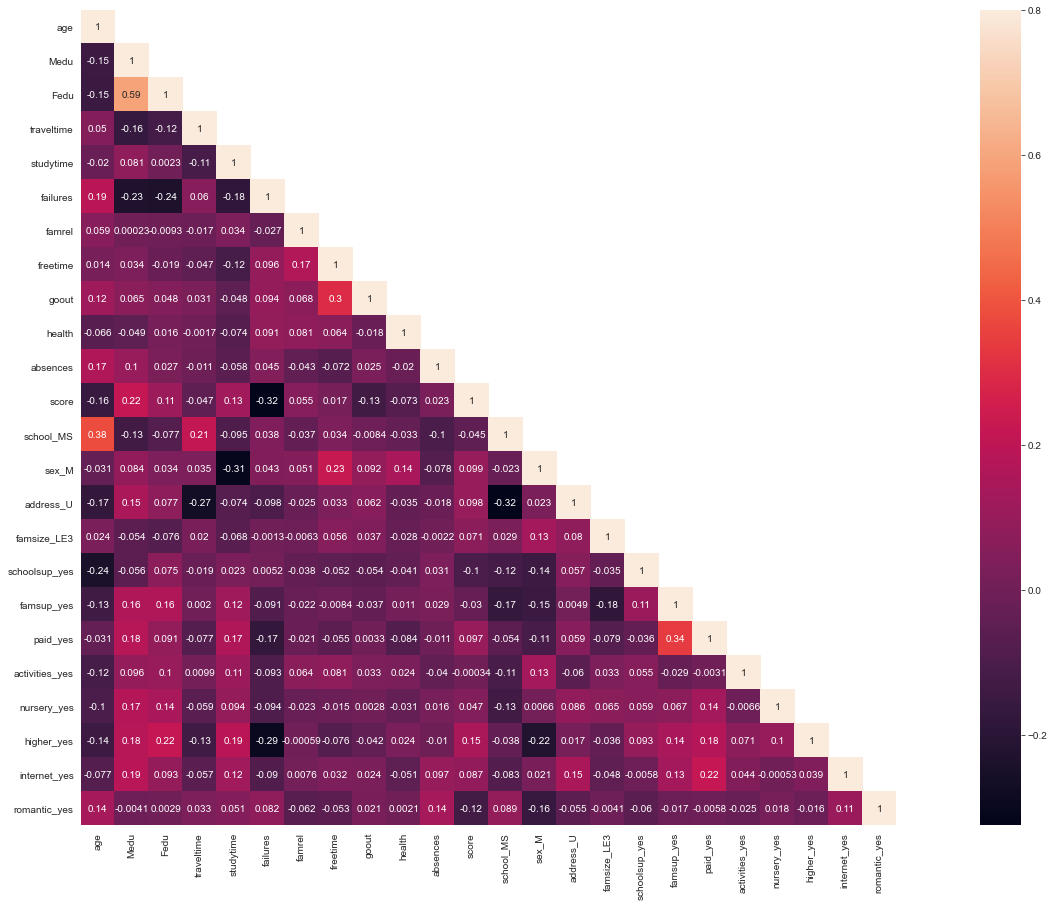

In [298]:
corrMatt = df_dummies.corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,15)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [299]:
df.school.value_counts()

GP    344
MS     45
Name: school, dtype: int64

In [302]:
df_corr = df_dummies.corr()

## Переменные, влияющие на score

In [308]:
df_corr[(df_corr["score"] > 0.1) | (df_corr["score"] < -0.1)].score

age             -0.155726
Medu             0.217195
Fedu             0.111152
studytime        0.125691
failures        -0.324783
goout           -0.129738
score            1.000000
schoolsup_yes   -0.104644
higher_yes       0.148126
romantic_yes    -0.123099
Name: score, dtype: float64

<AxesSubplot:xlabel='Mjob', ylabel='score'>

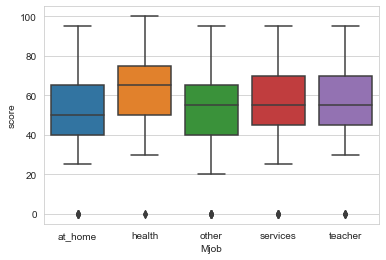

In [310]:
sns.boxplot(x="Mjob", y="score", data = df)

<AxesSubplot:xlabel='Fjob', ylabel='score'>

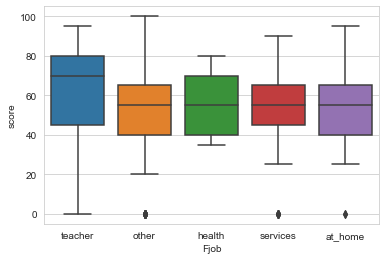

In [311]:
sns.boxplot(x="Fjob", y="score", data = df)